# Graphs for Paper

## Pt. 1: Visualizing ChIP-seq Data
We have a lot of ChIP-seq data. Let's take a look at what exactly it looks like.

In [3]:
import matplotlib.pyplot as plt
from threading import Thread
import numpy as np
import RELI as R
from RELI import RELI, LoadedData
import math
R.DEBUG = False

In [2]:
# Get list of all the locations of these ChIP-seqs + plot all this
sample = "hg19_0302"
data = [list(range(int(line.split("\t")[1]), int(line.split("\t")[2]))) for line in open(F"sample_data/ChIP-seq/{sample}").readlines()]

In [28]:
new_data = []
for d in data:
    for dd in d:
        new_data.append(dd)
num_bins = int(len(set(new_data)) / 100)
val = max(new_data)
new_data = new_data[:(val * val)]
new_data[:10], len(new_data), math.sqrt(len(new_data)), num_bins

([740594,
  740595,
  740596,
  740597,
  740598,
  740599,
  740600,
  740601,
  740602,
  740603],
 21673414,
 4655.4714047022135,
 204377)

In [29]:
num_overlaps = np.zeros(val)

for i in range(len(new_data)):
    num_overlaps[new_data[i] - 1] += 1

num_overlaps

array([0., 0., 0., ..., 1., 1., 1.])

In [30]:
v = int(math.sqrt(val))
num_overlaps = num_overlaps[:(v * v)]
num_overlaps = num_overlaps.reshape((v, v))

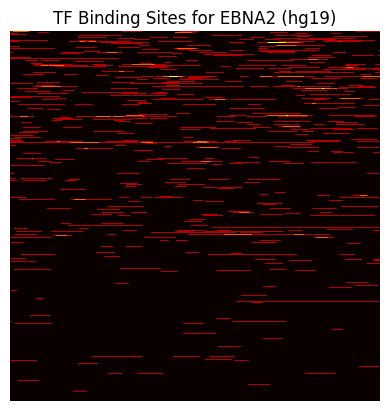

In [31]:
plt.title("TF Binding Sites for EBNA2 (hg19)")
plt.imshow(num_overlaps, cmap='hot', interpolation='nearest')
plt.axis("off")
plt.savefig("tfbs_EBNA2.png")
plt.show()

In [199]:
import os
samples = os.listdir("sample_data/ChIP-seq")
v = [line.split("\t")[3] for line in open("sample_data/ChIPseq.index").readlines()]

Analyzing sample: hg19_0001


KeyboardInterrupt: 

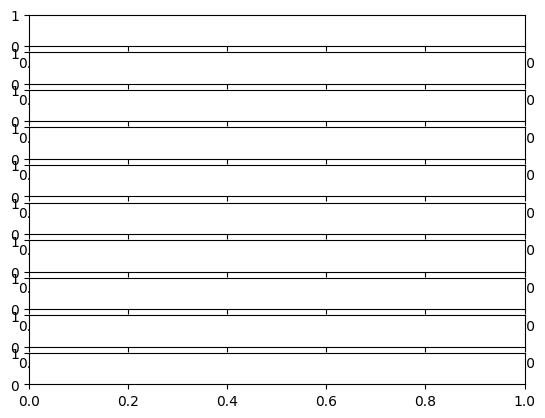

In [200]:
indices = []
fig, axes = plt.subplots(10, 1)

for i, sample in enumerate(samples[:10]):
    print(f"Analyzing sample: {sample}")
    data = [list(range(int(line.split("\t")[1]), int(line.split("\t")[2]))) for line in open(F"sample_data/ChIP-seq/{sample}").readlines()]

    print("Appending data...")
    new_data = []
    for d in data:
        for dd in d:
            new_data.append(dd)
    num_bins = int(len(set(new_data)) / 100)
    val = max(new_data)
    print("Plotting...")

    # plt.title(F"TF Binding Sites for {v[i]} ({sample})")
    # plt.imshow(num_overlaps, cmap='hot', interpolation='nearest')
    axes[i].hist(new_data, bins=250)
    axes[i].axis("off")

plt.show()

In [222]:
from pathlib import Path
import os

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
vitiligo = os.listdir("output_Vitiligo")

info = []
files = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"output_Vitiligo/{file}")
    if vitiligo_file.is_dir():
        sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
        sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
        sle_sum = {x[0]: float(x[1]) for x in sle_summary}
        
        vitiligo_rsids = list([l.strip() for l in open(f"output_Vitiligo/{file}" + "/result.rsids").readlines()])
        vitiligo_summary = [l.strip().split(": ") for l in open(f"output_Vitiligo/{file}" + "/summary.txt").readlines()[4:]]
        vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}
        
        print(F"Comparing vitiligo + SLE results for {file}")
        # Compare the # they have in common
        if (vitiligo_sum["P Value"] > 0.3 or sle_sum["P Value"] > 0.3) or (vitiligo_sum["Mean"] < 0 or sle_sum["Mean"] < 0):
            continue
        # Correcting error in the code
        
        # info.append([vitiligo_sum["Intersect"], sle_sum["Intersect"], vitiligo_sum["P Value"], sle_sum["P Value"]])
        info.append([vitiligo_sum["Intersect"], sle_sum["Intersect"], vitiligo_sum["Mean"], sle_sum["Mean"], vitiligo_sum["Std"], sle_sum["Std"]])
        files.append(file)
    else:
        print(f"Not there: {file}")

list(zip(files, info))

Comparing vitiligo + SLE results for ARID3A - hg19_0021
Comparing vitiligo + SLE results for ATF1 - hg19_0027
Not there: BATF - hg19_0042
Comparing vitiligo + SLE results for BCL3 - hg19_0050
Not there: BRD4 - hg19_0076
Not there: BRD4 - hg19_0101
Comparing vitiligo + SLE results for CEBPA - hg19_0134
Not there: CTCF - hg19_0182
Not there: CTCF - hg19_0190
Not there: CTCF - hg19_0206
Not there: CTCF - hg19_0219
Comparing vitiligo + SLE results for CTCF - hg19_0233
Comparing vitiligo + SLE results for CTCF - hg19_0234
Comparing vitiligo + SLE results for CTCF - hg19_0239
Comparing vitiligo + SLE results for CTCF - hg19_0253
Comparing vitiligo + SLE results for CTCF - hg19_0254
Not there: E2F6 - hg19_0290
Not there: EBNA2 - hg19_0302
Not there: EGR1 - hg19_0305
Not there: ELF1 - hg19_0312
Comparing vitiligo + SLE results for ELF1 - hg19_0314
Comparing vitiligo + SLE results for ELF2 - hg19_0323
Not there: EP300 - hg19_0340
Comparing vitiligo + SLE results for EP300 - hg19_0343
Comparing 

[('ARID3A - hg19_0021',
  [8.0,
   6.0,
   2.6956521739130435,
   2.32967032967033,
   1.7413529027714945,
   1.5196081044824734]),
 ('CEBPA - hg19_0134',
  [13.0,
   13.0,
   5.506246876561719,
   5.320679320679321,
   2.2996612220397576,
   2.0347142153289997]),
 ('CTCF - hg19_0233',
  [19.0,
   10.0,
   6.992503748125937,
   6.397602397602397,
   2.622404483574791,
   2.156792582923601]),
 ('FOS - hg19_1543',
  [2.0,
   14.0,
   1.3683158420789605,
   2.7092907092907095,
   1.1739193195911979,
   1.6602420294654678]),
 ('FOXA1 - hg19_0481',
  [1.0,
   16.0,
   0.5387306346826587,
   9.18981018981019,
   0.7571905434872122,
   7.130533907571874]),
 ('POLR2A - hg19_1540',
  [43.0,
   27.0,
   9.610694652673663,
   5.663336663336663,
   3.1855598678067105,
   2.1843865169755206]),
 ('RAD21 - hg19_1037',
  [8.0,
   5.0,
   3.269865067466267,
   3.7002997002997002,
   1.7976430878927006,
   1.705898563833711]),
 ('SP4 - hg19_1245',
  [6.0,
   6.0,
   1.1604197901049476,
   1.040959040959

In [235]:
from pathlib import Path
import os

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")

info = []
files = []
keep = []

# JUST SLE
def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
    sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
    sle_sum = {x[0]: float(x[1]) for x in sle_summary}

    if sle_sum["P Value"] > 0.05 or sle_sum["Intersect"] < sle_sum["Mean"] or file.split(" - ")[0] in keep:
        continue
    
    info.append([sle_sum["Intersect"], sle_sum["Mean"], sle_sum["Std"], sle_sum["P Value"]])
    files.append(file)
    keep.append(file.split(" - ")[0])

list(zip(files, info))

[('ARID3A - hg19_0021',
  [6.0, 2.32967032967033, 1.5196081044824734, 0.007860839982346188]),
 ('BRD4 - hg19_0076',
  [12.0, 3.032967032967033, 1.670901579361297, 4.012101441663986e-08]),
 ('CEBPA - hg19_0134',
  [13.0, 5.320679320679321, 2.0347142153289997, 8.027643363444293e-05]),
 ('CTCF - hg19_0182',
  [9.0, 5.511488511488512, 2.0327611473357803, 0.0430678159664317]),
 ('E2F6 - hg19_0290',
  [3.0, 0.8751248751248751, 0.9248732936952044, 0.010795786682827872]),
 ('EBNA2 - hg19_0302',
  [26.0, 4.355322338830585, 1.9429829923459718, 4.00950804853782e-29]),
 ('EGR1 - hg19_0305',
  [11.0, 1.4915084915084915, 1.2158033649311186, 2.625522429040849e-15]),
 ('ELF1 - hg19_0312',
  [11.0, 3.274225774225774, 2.530024607136973, 0.0011304310859913355]),
 ('FOS - hg19_1543',
  [14.0, 2.7092907092907095, 1.6602420294654678, 5.207749515689345e-12]),
 ('GATA1 - hg19_0536',
  [5.0, 1.2657342657342658, 1.1069393322647305, 0.00037108805191652554]),
 ('HMGN1 - hg19_0607',
  [27.0, 9.881118881118882, 2.5

In [236]:
[sle_sum["Mean"], sle_sum["Std"]]

[0.7822177822177823, 0.8488365428770545]

In [237]:
print("\n".join([x.split(" - ")[0] for x in files]))

ARID3A
BRD4
CEBPA
CTCF
E2F6
EBNA2
EGR1
ELF1
FOS
GATA1
HMGN1
IRF1
JUN
MYC
NFATC1
NFE2
PML
POLR2A
REST
SIN3A
SMARCA4
SMC3
SP1
SP4
SPI1
SRF
WRNIP1
YY1


In [248]:
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
pbc = os.listdir("output_PBC")
ra = os.listdir("output_RA")

info = []
files = []
keep = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"output_Vitiligo/{file}")
    if vitiligo_file.is_dir():
        pbc_file = Path(f"output_PBC/{file}")
        ra_file = Path(f"output_RA/{file}")
        if pbc_file.is_dir() and ra_file.is_dir():
            sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
            sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
            sle_sum = {x[0]: float(x[1]) for x in sle_summary}
            
            vitiligo_rsids = list([l.strip() for l in open(f"output_Vitiligo/{file}" + "/result.rsids").readlines()])
            vitiligo_summary = [l.strip().split(": ") for l in open(f"output_Vitiligo/{file}" + "/summary.txt").readlines()[4:]]
            vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}

            pbc_rsids = list([l.strip() for l in open(f"output_PBC/{file}" + "/result.rsids").readlines()])
            pbc_summary = [l.strip().split(": ") for l in open(f"output_PBC/{file}" + "/summary.txt").readlines()[4:]]
            pbc_sum = {x[0]: float(x[1]) for x in pbc_summary}

            ra_rsids = list([l.strip() for l in open(f"output_RA/{file}" + "/result.rsids").readlines()])
            ra_summary = [l.strip().split(": ") for l in open(f"output_RA/{file}" + "/summary.txt").readlines()[4:]]
            ra_sum = {x[0]: float(x[1]) for x in ra_summary}
            
            print(F"Comparing vitiligo + SLE + PBC + RA results for {file}")

            # Compare the # they have in common
            name = file.split(" - ")[0]
            if (vitiligo_sum["P Value"] > 0.3 or sle_sum["P Value"] > 0.3 or pbc_sum["P Value"] > 0.3 or ra_sum["P Value"] > 0.3) and name in keep:
                continue
            
            # Find genes that are sig for vitiligo + sle but not for pbc + ra or reverse
            info.append([vitiligo_sum["Intersect"], sle_sum["Intersect"], pbc_sum["Intersect"], ra_sum["Intersect"], (vitiligo_sum["P Value"] < 0.1 and sle_sum["P Value"] < 0.1), (pbc_sum["P Value"] > 0.1 and ra_sum["P Value"] > 0.1)])
            files.append(file)
            keep.append(name)
    else:
        print(f"Not there: {file}")

info

Comparing vitiligo + SLE + PBC + RA results for ARID3A - hg19_0021
Comparing vitiligo + SLE + PBC + RA results for ATF1 - hg19_0027
Not there: BATF - hg19_0042
Comparing vitiligo + SLE + PBC + RA results for BCL3 - hg19_0050
Not there: BRD4 - hg19_0076
Not there: BRD4 - hg19_0101
Comparing vitiligo + SLE + PBC + RA results for CEBPA - hg19_0134
Not there: CTCF - hg19_0182
Not there: CTCF - hg19_0190
Not there: CTCF - hg19_0206
Not there: CTCF - hg19_0219
Comparing vitiligo + SLE + PBC + RA results for CTCF - hg19_0233
Comparing vitiligo + SLE + PBC + RA results for CTCF - hg19_0234
Comparing vitiligo + SLE + PBC + RA results for CTCF - hg19_0239
Comparing vitiligo + SLE + PBC + RA results for CTCF - hg19_0253
Comparing vitiligo + SLE + PBC + RA results for CTCF - hg19_0254
Not there: E2F6 - hg19_0290
Not there: EBNA2 - hg19_0302
Not there: EGR1 - hg19_0305
Not there: ELF1 - hg19_0312
Comparing vitiligo + SLE + PBC + RA results for ELF1 - hg19_0314
Comparing vitiligo + SLE + PBC + RA re

[[8.0, 6.0, 2.0, 10.0, True, False],
 [2.0, 6.0, 2.0, 10.0, False, False],
 [2.0, 0.0, 2.0, 4.0, False, False],
 [13.0, 13.0, 4.0, 13.0, True, True],
 [19.0, 10.0, 2.0, 15.0, True, True],
 [2.0, 5.0, 30.0, 7.0, False, False],
 [0.0, 1.0, 4.0, 6.0, False, False],
 [2.0, 5.0, 30.0, 7.0, False, False],
 [0.0, 3.0, 4.0, 6.0, False, False],
 [2.0, 14.0, 30.0, 101.0, False, False],
 [1.0, 16.0, 0.0, 0.0, False, True],
 [3.0, 4.0, 0.0, 0.0, False, True],
 [0.0, 1.0, 0.0, 0.0, False, True],
 [18.0, 7.0, 4.0, 13.0, False, True],
 [0.0, 0.0, 0.0, 0.0, False, True],
 [2.0, 18.0, 30.0, 101.0, False, False],
 [2.0, 18.0, 30.0, 101.0, False, False],
 [2.0, 3.0, 30.0, 101.0, False, False],
 [2.0, 0.0, 0.0, 2.0, False, True],
 [0.0, 3.0, 4.0, 6.0, False, False],
 [0.0, 1.0, 0.0, 0.0, False, True],
 [43.0, 27.0, 30.0, 101.0, True, False],
 [8.0, 5.0, 2.0, 10.0, False, False],
 [6.0, 6.0, 3.0, 3.0, True, False],
 [6.0, 6.0, 3.0, 3.0, True, False],
 [0.0, 0.0, 3.0, 3.0, False, False],
 [0.0, 16.0, 0.0, 0

In [249]:
print("\n".join([file.split(" - ")[0] for file in files]))

ARID3A
ATF1
BCL3
CEBPA
CTCF
ELF1
ELF2
EP300
ETV1
FOS
FOXA1
FOXP2
GATA1
HNF4A
HSF1
NFATC1
NFATC2
NFKB1
NR3C1
PML
POLR2A
POLR2A
RAD21
SP4
SRF
SUZ12
TFAP2C
UBTF
USF2
VEZF1


In [250]:
inf = list(zip(info, files))
print(inf)
inf.sort(reverse=True)

info, files = zip(*inf)
info = np.array(info)
info

[([8.0, 6.0, 2.0, 10.0, True, False], 'ARID3A - hg19_0021'), ([2.0, 6.0, 2.0, 10.0, False, False], 'ATF1 - hg19_0027'), ([2.0, 0.0, 2.0, 4.0, False, False], 'BCL3 - hg19_0050'), ([13.0, 13.0, 4.0, 13.0, True, True], 'CEBPA - hg19_0134'), ([19.0, 10.0, 2.0, 15.0, True, True], 'CTCF - hg19_0233'), ([2.0, 5.0, 30.0, 7.0, False, False], 'ELF1 - hg19_0314'), ([0.0, 1.0, 4.0, 6.0, False, False], 'ELF2 - hg19_0323'), ([2.0, 5.0, 30.0, 7.0, False, False], 'EP300 - hg19_0343'), ([0.0, 3.0, 4.0, 6.0, False, False], 'ETV1 - hg19_0424'), ([2.0, 14.0, 30.0, 101.0, False, False], 'FOS - hg19_1543'), ([1.0, 16.0, 0.0, 0.0, False, True], 'FOXA1 - hg19_0481'), ([3.0, 4.0, 0.0, 0.0, False, True], 'FOXP2 - hg19_0510'), ([0.0, 1.0, 0.0, 0.0, False, True], 'GATA1 - hg19_0545'), ([18.0, 7.0, 4.0, 13.0, False, True], 'HNF4A - hg19_0618'), ([0.0, 0.0, 0.0, 0.0, False, True], 'HSF1 - hg19_0627'), ([2.0, 18.0, 30.0, 101.0, False, False], 'NFATC1 - hg19_1544'), ([2.0, 18.0, 30.0, 101.0, False, False], 'NFATC2 - 

array([[ 43.,  27.,  30., 101.,   1.,   0.],
       [ 24.,  10.,   9.,   6.,   0.,   1.],
       [ 19.,  10.,   2.,  15.,   1.,   1.],
       [ 18.,   7.,   4.,  13.,   0.,   1.],
       [ 13.,  13.,   4.,  13.,   1.,   1.],
       [  8.,   6.,   2.,  10.,   1.,   0.],
       [  8.,   5.,   2.,  10.,   0.,   0.],
       [  6.,   6.,   3.,   3.,   1.,   0.],
       [  6.,   6.,   3.,   3.,   1.,   0.],
       [  3.,   4.,   0.,   0.,   0.,   1.],
       [  3.,   1.,   9.,   6.,   0.,   0.],
       [  3.,   1.,   9.,   6.,   0.,   0.],
       [  2.,  18.,  30., 101.,   0.,   0.],
       [  2.,  18.,  30., 101.,   0.,   0.],
       [  2.,  14.,  30., 101.,   0.,   0.],
       [  2.,   6.,   2.,  10.,   0.,   0.],
       [  2.,   5.,  30.,   7.,   0.,   0.],
       [  2.,   5.,  30.,   7.,   0.,   0.],
       [  2.,   3.,  30., 101.,   0.,   0.],
       [  2.,   0.,   2.,   4.,   0.,   0.],
       [  2.,   0.,   0.,   2.,   0.,   1.],
       [  1.,  16.,   0.,   0.,   0.,   1.],
       [  

In [239]:
import pandas as pd

data = pd.DataFrame([[x, *y[:4]] for x, y in zip(files, list(info))])

# data.columns = ["TFs", "Overlaps (Vitiligo)", "Overlaps (Lupus)", "P Value (Vitiligo)", "P Value (Lupus)"]
# data.set_index("TFs")

data

,0,1,2,3,4
0,HMGN1 - hg19_0607,27.0,9.881119,2.541034,8.085912e-12
1,EBNA2 - hg19_0302,26.0,4.355322,1.942983,4.009508e-29
2,IRF1 - hg19_0640,15.0,3.827173,1.858252,9.131572e-10
3,FOS - hg19_1543,14.0,2.709291,1.660242,5.207750e-12
4,WRNIP1 - hg19_1477,14.0,1.741259,1.287628,8.625229e-22
5,CEBPA - hg19_0134,13.0,5.320679,2.034714,8.027643e-05
6,NFATC1 - hg19_0837,13.0,1.873127,1.315632,1.366592e-17
7,NFE2 - hg19_0838,13.0,1.014486,1.297863,1.293738e-20
8,SPI1 - hg19_1254,12.0,7.984016,2.155863,3.124381e-02
9,BRD4 - hg19_0076,12.0,3.032967,1.670902,4.012101e-08


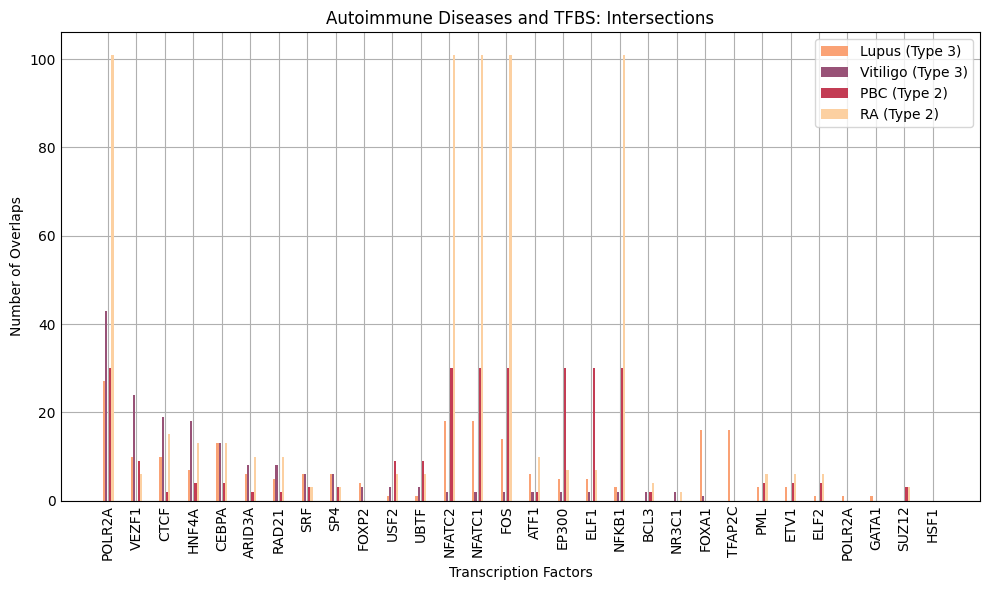

In [251]:
fig, ax = plt.subplots(figsize=(10, 6))

info = np.array(info)
vitiligo = [float(x) for x in info[:,0]]
sle = [float(x) for x in info[:,1]]

pbc = [float(x) for x in info[:,2]]
ra = [float(x) for x in info[:,3]]
# std_vitiligo = [float(x) / 2 for x in info[:,2]]

# pbc = [float(x) for x in info[:,2]]
# ra = [float(x) for x in info[:,3]]
plt.style.use('_mpl-gallery')

x = np.array([x * 1.3 for x in list(range(len(sle)))])
ax.set_ylabel("Number of Overlaps")
ax.set_xlabel("Transcription Factors")
ax.set_xticks(x, [x.split(" - ")[0] for x in files], rotation=90)
# plt.yticks([y for y in range(max(sle))])

ax.bar(x - 0.20, sle, width=0.1, color='#FAA275', label="Lupus (Type 3)")
ax.bar(x - 0.10, vitiligo, width=0.1, color='#985277', label="Vitiligo (Type 3)")
ax.bar(x + 0.10, pbc, width=0.1, color='#C33C54', label="PBC (Type 2)")
ax.bar(x + 0.20, ra, width=0.1, color='#FCD0A1', label="RA (Type 2)")

# ax.bar(x + 0.05, pbc, width=0.1, color='#C33C54', align='center', label="PBC (Type 2)")
# ax.bar(x + 0.15, ra, width=0.1, color='#FCD0A1', align='center', label="RA (Type 2)")

ax.set_title("Autoimmune Diseases and TFBS: Intersections")
ax.legend(loc="best")
plt.tight_layout()
plt.savefig("figures/avg_sle_pbc_ra_vitiligo_2.png")
plt.show()

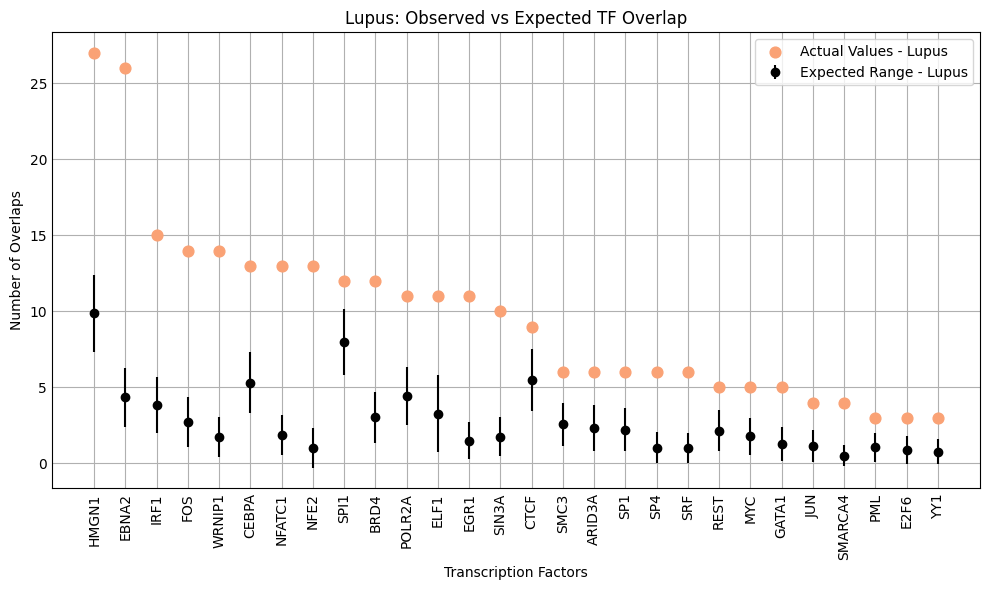

In [241]:
fig, ax = plt.subplots(figsize=(10, 6))

info = np.array(info)
sle = [float(x) for x in info[:,0]]
mean_sle = [float(x) for x in info[:,1]]
std_sle = [float(x) for x in info[:,2]]

# std_vitiligo = [float(x) / 2 for x in info[:,2]]

# pbc = [float(x) for x in info[:,2]]
# ra = [float(x) for x in info[:,3]]
plt.style.use('_mpl-gallery')

x = np.array([x * 1.3 for x in list(range(len(sle)))])
ax.set_ylabel("Number of Overlaps")
ax.set_xlabel("Transcription Factors")
ax.set_xticks(x, [x.split(" - ")[0] for x in files], rotation=90)
# plt.yticks([y for y in range(max(sle))])

ax.errorbar(x, mean_sle, std_sle, linestyle='None', marker='o', color="black", label = "Expected Range - Lupus")

ax.scatter(x, sle, color='#FAA275', s=60, label="Actual Values - Lupus")

# ax.bar(x + 0.05, pbc, width=0.1, color='#C33C54', align='center', label="PBC (Type 2)")
# ax.bar(x + 0.15, ra, width=0.1, color='#FCD0A1', align='center', label="RA (Type 2)")

ax.set_title("Lupus: Observed vs Expected TF Overlap")
ax.legend(loc="best")
plt.tight_layout()
plt.savefig("figures/avg_vitiligo.png")
plt.show()

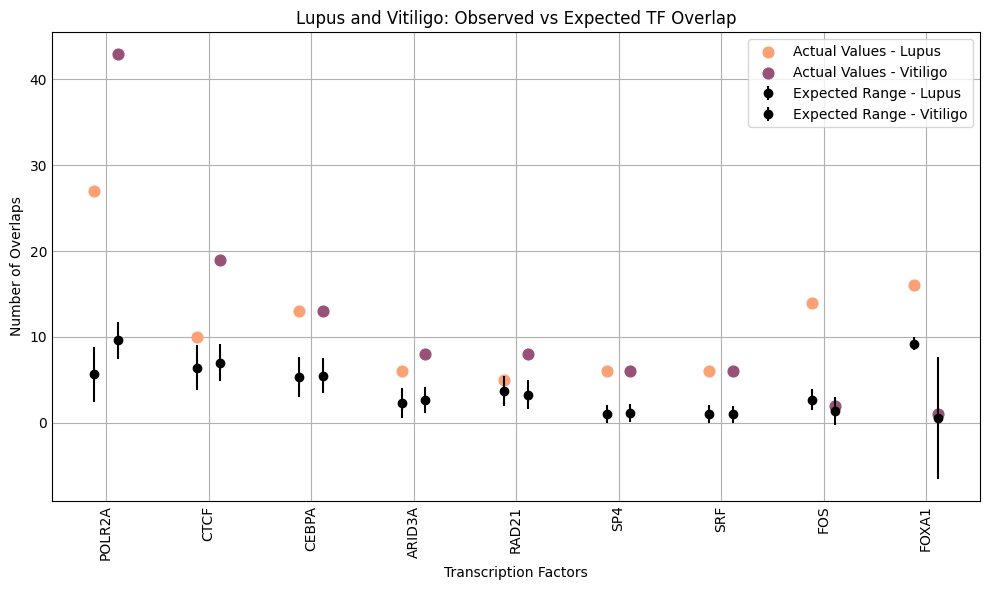

In [225]:
fig, ax = plt.subplots(figsize=(10, 6))

info = np.array(info)
vitiligo = [float(x) for x in info[:,0]]
sle = [float(x) for x in info[:,1]]

mean_vitiligo = [float(x) for x in info[:,2]]
mean_sle = [float(x) for x in info[:,3]]

std_sle = [float(x) for x in info[:,4]]
std_vitiligo = [float(x) for x in info[:,5]]

# std_vitiligo = [float(x) / 2 for x in info[:,2]]

# pbc = [float(x) for x in info[:,2]]
# ra = [float(x) for x in info[:,3]]
plt.style.use('_mpl-gallery')

x = np.array([x * 1.3 for x in list(range(len(sle)))])
ax.set_ylabel("Number of Overlaps")
ax.set_xlabel("Transcription Factors")
ax.set_xticks(x, [x.split(" - ")[0] for x in files], rotation=90)
# plt.yticks([y for y in range(max(sle))])

ax.errorbar(x - 0.15, mean_sle, std_sle, linestyle='None', marker='o', color="black", label = "Expected Range - Lupus")
ax.errorbar(x + 0.15, mean_vitiligo, std_vitiligo, linestyle='None', marker='o', color="black", label = "Expected Range - Vitiligo")

ax.scatter(x - 0.15, sle, color='#FAA275', s=60, label="Actual Values - Lupus")
ax.scatter(x + 0.15, vitiligo, color='#985277', s=60, label="Actual Values - Vitiligo")

# ax.bar(x + 0.05, pbc, width=0.1, color='#C33C54', align='center', label="PBC (Type 2)")
# ax.bar(x + 0.15, ra, width=0.1, color='#FCD0A1', align='center', label="RA (Type 2)")

ax.set_title("Lupus and Vitiligo: Observed vs Expected TF Overlap")
ax.legend(loc="best")
plt.tight_layout()
plt.savefig("figures/avg_sle_vitiligo.png")
plt.show()

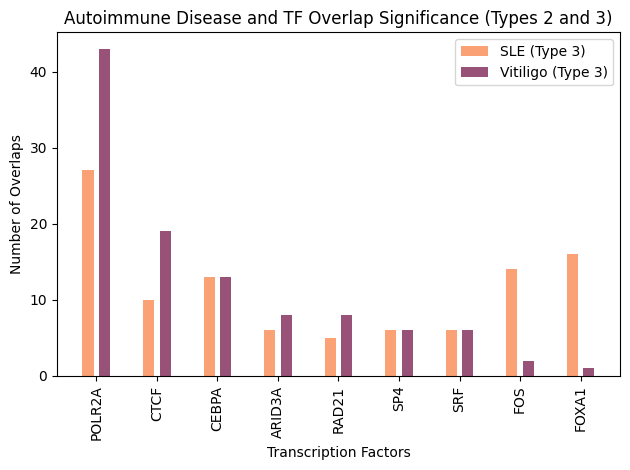

In [172]:
fig, ax = plt.subplots()

vitiligo = [float(x) for x in info[:,0]]
sle = [float(x) for x in info[:,1]]
# pbc = [float(x) for x in info[:,2]]
# ra = [float(x) for x in info[:,3]]

x = np.array([x * 1.1 for x in list(range(len(vitiligo)))])
ax.set_ylabel("Number of Overlaps")
ax.set_xlabel("Transcription Factors")

plt.xticks(x, [x.split(" - ")[0] for x in files], rotation=90)
# plt.yticks([y for y in range(max(sle))])
ax.bar(x - 0.15, sle, width=0.2, color='#FAA275', align='center', label="SLE (Type 3)")
ax.bar(x + 0.15, vitiligo, width=0.2, color='#985277', align='center', label="Vitiligo (Type 3)")
# ax.bar(x - 0.15, sle, width=0.2, color='#74bfdf', align='center', label="SLE (Type 3)")
# ax.bar(x + 0.15, vitiligo, width=0.2, color='#3c9cd0', align='center', label="Vitiligo (Type 3)")
# ax.bar(x + 0.15, pbc, width=0.2, color='#da8c9b', align='center', label="PBC (Type 2)")
# ax.bar(x + 0.35, ra, width=0.2, color='#851e61', align='center', label="RA (Type 2)")

ax.set_title("Autoimmune Disease and TF Overlap Significance (Types 2 and 3)")
ax.legend(loc="best")
plt.tight_layout()
plt.savefig("intersects_type23_analysis.png")
plt.show()

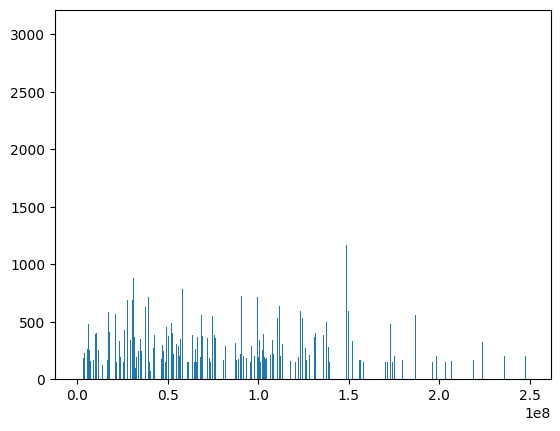

In [12]:
# Summarize down information into table
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")
vitiligo = os.listdir("mas_type3")

info = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    vitiligo_file = Path(f"mas_type3/{file}")
    if vitiligo_file.is_dir():
        sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
        sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[4:]]
        sle_sum = {x[0]: float(x[1]) for x in sle_summary}
        
        vitiligo_rsids = list([l.strip() for l in open(f"mas_type3/{file}" + "/result.rsids").readlines()])
        vitiligo_summary = [l.strip().split(": ") for l in open(f"mas_type3/{file}" + "/summary.txt").readlines()[4:]]
        vitiligo_sum = {x[0]: float(x[1]) for x in vitiligo_summary}
        
        print(F"Comparing vitiligo + SLE results for {file}")
        # Compare the # they have in common
        info.append([vitiligo_sum["Relative Risk"], sle_sum["Relative Risk"], file])
    else:
        print(f"Not there: {file}")


## Pt. 2: Run RELI on ALL Data
This will likely take several hours.

Analyzing SNP Significance for SLE

In [106]:
from pathlib import Path

# Look through the data for SLE + Vitiligo builds
sle = os.listdir("output_SLE")

sle_info = []
sle_tf = []
sle_rsid_list = []

def jaccard(a, b):
    both = set(a).intersection(b)
    return len(both) / len(set([*a, *b]))

for file in sle:
    sle_rsids = list([l.strip() for l in open("output_SLE/" + file + "/result.rsids").readlines()])
    sle_summary = [l.strip().split(": ") for l in open("output_SLE/" + file + "/summary.txt").readlines()[1:]]
    sle_sum = {x[0]: float(x[1]) if x[1].replace('.','',1).isdigit() else x[1] for x in sle_summary}

    # Compare the # they have in common
    sle_info.append([sle_sum["P Value"], sle_sum["Relative Risk"]])
    sle_tf.append(sle_sum["TF"])
    sle_rsid_list.append(sle_rsids)

sle_info = np.array(sle_info, dtype=float)
sle_info

array([[7.86083998e-03, 2.57547170e+00],
       [5.00000000e-01, 1.79256827e+00],
       [5.00000000e-01, 2.57326478e+00],
       [5.00000000e-01, 0.00000000e+00],
       [4.01210144e-08, 3.95652174e+00],
       [8.02764336e-05, 2.44329703e+00],
       [4.30678160e-02, 1.63295269e+00],
       [4.56453425e-01, 1.04926625e+00],
       [1.00071335e-01, 1.39259878e+00],
       [5.00000000e-01, 1.94105100e-01],
       [4.74342775e-02, 1.56308557e+00],
       [9.08465903e-01, 6.00620021e-01],
       [8.34012488e-01, 7.55788591e-01],
       [4.21605884e-02, 1.62026546e+00],
       [5.00000000e-01, 6.48016277e-01],
       [1.07957867e-02, 3.42808219e+00],
       [4.00950805e-29, 5.96970740e+00],
       [2.62552243e-15, 7.37508372e+00],
       [1.13043109e-03, 3.35957285e+00],
       [5.00000000e-01, 2.13341858e+00],
       [5.00000000e-01, 3.92549020e+00],
       [5.00000000e-01, 7.70236996e-01],
       [5.00000000e-01, 2.86000000e+00],
       [5.00000000e-01, 8.08888889e-01],
       [5.000000

In [117]:
# Go through each line + get list of all RSIDs we matched on
sle_pvals = sle_info[:,0]

all_rsids = []

for rsid_list in sle_rsid_list:
    for rsid in rsid_list:
        all_rsids.append(rsid)

all_rsids = list(set(all_rsids))
# all_rsids.sort()

all_rsids, len(all_rsids)

(['rs57095329',
  'rs460106',
  'rs2524099',
  'rs6984496',
  'rs767448',
  'rs142836782',
  'rs3807307',
  'rs3131381',
  'rs1058026',
  'rs28403951',
  'rs17533090',
  'rs3214973',
  'rs3807306',
  'rs33969397',
  'rs9894370',
  'rs11602895',
  'rs1150757',
  'rs112743130',
  'rs12355313',
  'rs12311303',
  'rs3778753',
  'rs4693800',
  'rs35105110',
  'rs3834310',
  'rs1143679',
  'rs9908694',
  'rs3763305',
  'rs148444157',
  'rs6904996',
  'rs9357155',
  'rs3778752',
  'rs11059927',
  'rs2250788',
  'rs3862468',
  'rs112771360',
  'rs80022860',
  'rs12924667',
  'rs113894104',
  'rs4948496',
  'rs3893661',
  'rs41508750',
  'rs2251056',
  'rs34616325',
  'rs1385374',
  'rs34291217',
  'rs9271588',
  'rs2393743',
  'rs4840525',
  'rs71542490',
  'rs112876941',
  'rs6479781',
  'rs12937330',
  'rs5753607',
  'rs1861548',
  'rs2296362',
  'rs923077',
  'rs34377413',
  'rs6903608',
  'rs9888879',
  'rs12709364',
  'rs1270942',
  'rs558702',
  'rs2230926',
  'rs13106926',
  'rs6479782'

C:\Users\sarah\AppData\Local\Temp\ipykernel_33164\3222143465.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


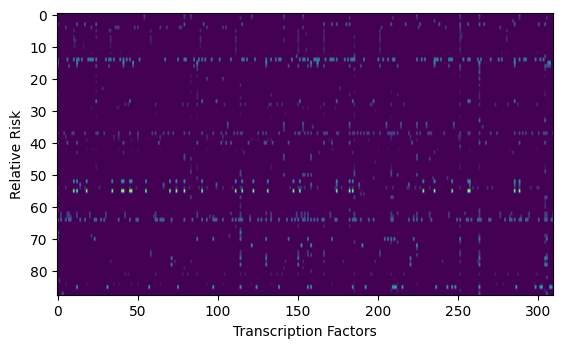

In [158]:
# Now go through the list of all TFs; if we see a value, set it to the pval
heatmap = []
num_rsids = len(all_rsids)

for [pval, rel_risk], tf, rsid_list in zip(sle_info, sle_tf, sle_rsid_list):
    # Get location of each RSID in sle_tf and turn on
    ind = []
    for rsid in rsid_list:
        ind.append(all_rsids.index(rsid))
    
    if rel_risk <= 0.5:
        continue
    heatmap.append([rel_risk if i in ind else 0 for i in range(num_rsids)])

plt, ax = plt.subplots()

ax.set_ylabel("Relative Risk")
ax.set_xlabel("Transcription Factors")
ax.imshow(heatmap, aspect=2)

plt.show()